# Lab demonstration-1

**Source**: Modified from Dr. Gamage 2022 ANLY-511 content 

* **Installing R-packages locally** 
  * **Option-1**: Just open the `.qmd` file in R-Studio and it will automatically install the required packages for the script 
  * **Option-2**: (not recommended). You can also install packages one at a time with `install.packages(package_name)`

## Import

In [1]:
# IMPORT LIBRARIES 
library(ggplot2)

# "The ISwR package is for "introductory statistics with R"
# providing datasets and functions for teaching and learning statistical concepts."
library(ISwR)
set.seed(1009)

## Useful Functions

If you have not do so already, please read and practice Boot-camp Week 6-7.  

In [2]:
## Simple frequency distribution
set.seed(7)
table(rpois(100, 5))


 1  2  3  4  5  6  7  8  9 10 11 12 
 2  8 14 21 16 14 11  6  2  3  2  1 

### Implicit loops

A common application of loops is to apply a function to each element of a set of values or vectors and collect the results in a single structure. In R this is abstracted by the functions lapply and sapply. The former always returns a list (hence the ‘l’), whereas the latter tries to simplify (hence the ‘s’) the result to a vector or a matrix if possible. So, to compute the mean of each variable in a data frame of numeric vectors, you can do the following:

In [3]:
data(thuesen)
head(thuesen)

lapply(thuesen, mean, na.rm=T)#gives a list of means of each variable
sapply(thuesen, mean, na.rm=T)#gives a (similar to a table) of means of each variable

#na.rm=T is remove NAs

sapply(thuesen, function(x){(x^2)})

,blood.glucose,short.velocity
,<dbl>,<dbl>
1,15.3,1.76
2,10.8,1.34
3,8.1,1.27
4,19.5,1.47
5,7.2,1.27
6,5.3,1.49


$blood.glucose
[1] 10.3

$short.velocity
[1] 1.325652

blood.glucose short.velocity 
     10.300000       1.325652

blood.glucose,short.velocity
234.09,3.0976
116.64,1.7956
65.61,1.6129
380.25,2.1609
51.84,1.6129
28.09,2.2201
86.49,1.7161
123.21,1.1881
56.25,1.3924
148.84,1.4884


### as. numeric function

I'm going to use this inside my function `mytoss`

In [4]:
a=5
b=7
(a<b)
(a>b)

(as.numeric(a<b)) #true
(as.numeric(a>b)) #false

is.factor(a)

[1] TRUE

[1] FALSE

[1] 1

[1] 0

[1] FALSE

# Example-1: Coin toss
`Simulating a Single Toss`

Write a function that outputs a 1 (success, probability p) or a 0 (fail, probability 1-p).

Use the random function `runif()`. It produces a uniformly distributed random values, $u \epsilon (0, 1)$.

a. Define a function to simulate a single toss and try it out

In [5]:
mytoss = function(p){
  u <- runif(1)
  x <- as.numeric(u < p)#when p is the larger number, there is a higher chance of being this argument true.
  return(x)
}
mytoss(.5) #success or failure when prob=0.5
mytoss(.2) #success or failure when prob=0.2
mytoss(.8) #success or failure when prob=0.8

[1] 1

[1] 0

[1] 1

b. Simulate 10 tosses, using the replicate() function

In [6]:
replicate(10,mytoss(.3)) #success or failure when prob=0.3, for 10 tosses 
replicate(10,mytoss(.7)) #success or failure when prob=0.7, for 10 tosses 

[1] 0 0 0 0 1 0 1 0 0 1

[1] 0 1 1 1 0 1 0 1 1 1

c. the number of tosses needed to get to three successes with success probability 0.3.

=> this answer doesn't give you the number of tosses. Try and see.

In [7]:
p=0.3
sum(replicate(3,mytoss(p))) #not a valid output

[1] 1

d. the number of tosses needed to get to three successes with success probability 0.4.

=> this answer doesn't give you the number of tosses. Try and see.

In [8]:
p=0.8
sum(replicate(3,mytoss(p)))#this doesnot give a valid output

[1] 3

e. number of attempts: number of failures until the first success.

In [9]:
myattempts = function(p){ counter <- 0
while (mytoss(p) == 0){ counter <- counter + 1 }
return(counter) }

myattempts(.2) #number of failures until the first success, when success prob =0.2
myattempts(.7) #number of failures until the first success, when success prob =0.7

p=0.3
sum(replicate(3,myattempts(p))) #number of failures until the 3 successes 

[1] 0

[1] 3

[1] 10

# Example-2: Baby names

Read csv file with baby names and make new column names

In [10]:
yob2001 <- read.csv("./data/yob2001.txt",header=FALSE, stringsAsFactors=FALSE)
names(yob2001) <- c("name","gender","count")
head(yob2001)

,name,gender,count
,<chr>,<chr>,<int>
1,Emily,F,25052
2,Madison,F,22158
3,Hannah,F,20707
4,Ashley,F,16524
5,Alexis,F,16396
6,Sarah,F,15890


a. Number of male and female names 

The table function returns a vector whose components have names.

In [11]:
table(yob2001$gender)
(x.0 <- table(yob2001$gender))

names(x.0)
x.0[1] # first column
x.0["F"] #same


    F     M 
17966 12295 


    F     M 
17966 12295 

[1] "F" "M"

F 
17966

F 
17966

b. Number of female and male births, using the aggregate() function

In [12]:
#?aggregate : you can always use "?" and a function to get help on the function
aggregate(count ~ gender, data = yob2001, FUN = "sum") #summation of categories of the variable gender
aggregate(count ~ gender, data = yob2001, FUN = "mean")

gender,count
<chr>,<int>
F,1799049
M,1941251


gender,count
<chr>,<dbl>
F,100.1363
M,157.8895


# Example-3: Sampling

In R, you can simulate using the "sample" function. If you want to pick five numbers at random from the set 1:40, then you can write

In [13]:
# without replacement
sample(1:40,5)

#or
sample(40,5)

[1] 31 21 23 40 34

[1] 31 34 18  8 17

Sampling with replacement is suitable for modelling coin tosses or throws of a die. So, for instance, to simulate 10 coin tosses we could write,

In [14]:
#with replacement
sample(c("H","T"), 10, replace=T)

[1] "H" "T" "H" "T" "H" "T" "H" "T" "H" "H"

In fair coin-tossing, the probability of heads should equal the probability of tails, but the idea of a random event is not restricted to symmetric cases. It could be equally well applied to other cases, such as the successful out- come of a surgical procedure. Hopefully, there would be a better than 50% chance of this. You can simulate data with nonequal probabilities for the outcomes (say, a 90% chance of success) by using the prob argument to sample, as in

In [15]:
sample(c("succ", "fail"), 10, replace=T, prob=c(0.9, 0.1))

[1] "succ" "succ" "succ" "succ" "succ" "succ" "succ" "succ" "fail" "fail"

a. Sample 30 names with replacement from the baby names. 

Use probabilities that are proportional to the counts.

In [16]:
myclass <- sort(sample(yob2001$name, 30, replace = T))
myclass

[1] "Arrion"   "Autumn"   "Brande"   "Coral"    "Corina"   "Cortlyn" 
 [7] "Crayton"  "Dacey"    "Derico"   "Devvon"   "Dwayne"   "Eilene"  
[13] "Evalynn"  "Haneef"   "Ianna"    "Jalan"    "Jason"    "Jelen"   
[19] "Johnesha" "Kier"     "Lakeitha" "Lindsay"  "Mattisyn" "Milady"  
[25] "Montrey"  "Myliyah"  "Reyes"    "Sapphira" "Sheridan" "Tiyona"

b. Compute actual probabilities of occurrence

In [17]:
yob2001$prob <- yob2001$count/sum(yob2001$count)
prob.table <- data.frame(yob2001$name,yob2001$prob) 
head(prob.table)

,yob2001.name,yob2001.prob
,<chr>,<dbl>
1,Emily,0.006697858
2,Madison,0.005924124
3,Hannah,0.005536187
4,Ashley,0.004417827
5,Alexis,0.004383606
6,Sarah,0.004248322


c.  Find all names which occur both as male and female baby names.

First make subsets of female and male births. Then find the set intersection of the names. 

In [18]:
femalebirths <- yob2001[yob2001$gender == "F",]
malebirths <- yob2001[yob2001$gender == "M",]
intersect(femalebirths$name, malebirths$name) -> both
head(both)

[1] "Emily"   "Madison" "Hannah"  "Ashley"  "Alexis"  "Sarah"

d. Find out how often each of these names is used for females and males. 

Use subsetting to make data frames of female and male birth data for names that are used for both genders. We may drop the gender variable.


In [19]:
yob2001.female.both <- yob2001[is.element(yob2001$name,both) & yob2001$gender == "F",c(1,3)]
names(yob2001.female.both) <- c("name","female.count")
yob2001.male.both <- yob2001[is.element(yob2001$name,both) & yob2001$gender == "M",c(1,3)]
names(yob2001.male.both) <- c("name","male.count")

e. Now merge the two data frame by names. R finds the merge variable (i.e. name) automatically.

In [20]:
yob2001.both <- merge(yob2001.female.both,yob2001.male.both)
head(yob2001.both)

,name,female.count,male.count
,<chr>,<int>,<int>
1,Aaliyah,3352,8
2,Aaren,6,30
3,Aarin,8,10
4,Aarion,7,12
5,Aaron,37,9531
6,Aarya,7,5


# Example-4. Lotto
Probability Example: Lotto

![](lotto.jpg)

Pick six out of 49 number "at random". 

The number of ways to do this,

$$
49\cdot 48 \cdot \dots \cdot 44 = 10,068,347,520
$$ 



## R Simulation and Computation

* Probabilistic model to simulate this 

In [21]:
x <- sample(49,6,replace = F)
x
sort(x)

[1] 24 32 15 37 23  2

[1]  2 15 23 24 32 37

* Find Prob(1,2,3,4,5,49 \textit{in any order}). This is 
$\frac{1}{\binom{49}{6}}$. 

In [22]:
1/choose(49,6)

[1] 7.151124e-08

* Find Prob(1,2,3,4,5 are among the six numbers). This is 
$\frac{44}{\binom{49}{6}}$. __Why?__

In [23]:
44/choose(49,6)

[1] 3.146494e-06

# Data Visualisation

Let's try few plots that we discussed in the class. We will be using **GSS2018** Dataset.

_The General Social Surveys (GSS) have been conducted by the National Opinion Research Center (NORC) annually since 1972 except for the years 1979, 1981, and 1992 (a supplement was added in 1992), and biennially beginning in 1994. The GSS is designed as part of a program of social indicator research, replicating questionnaire items and wording in order to facilitate time-trend studies. The 2006 GSS features special modules on mental health and social networks. Items on religion cover denominational affiliation, church attendance, religious upbringing, personal beliefs, and religious experiences._

In [24]:
data=read.csv("./data/GSS2018.csv", header = TRUE)
head(data)
str(data)

,X...ID,Region,Gender,Degree,Marital,Religion,Happy,Income,Politics,GunLaw,OwnGun,SpendMilitary,SpendEduc,SpendEnv,SpendCity,Pres16,Age
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Middle Atlantic,Male,Junior College,Never Married,Christian,NA,Below Average,Conservative,NA,Agree,NA,NA,Too Little,About Right,Romney,43
2,2,Middle Atlantic,Female,High School,Separated,Catholic,NA,Far Below Average,NA,Not Legal,NA,Too Much,Too Little,About Right,About Right,Obama,74
3,3,Middle Atlantic,Male,Bachelor,Married,None,Very Happy,Above Average,Slghtly Conservative,Legal,Agree,NA,NA,Too Little,NA,Romney,42
4,4,Middle Atlantic,Female,Bachelor,Married,Protestant,Very Happy,Above Average,Moderate,Not Legal,Disagree,Too Much,Too Little,Too Little,Too Little,Romney,63
5,5,Middle Atlantic,Male,Graduate,Divorced,Catholic,NA,Below Average,Extrmly Conservative,Not Legal,NA,About Right,Too Little,Too Little,About Right,Romney,71
6,6,New England,Female,Bachelor,Widowed,Catholic,NA,Average,Slightly Liberal,NA,NA,Too Much,Too Little,About Right,About Right,Obama,67


'data.frame':	2348 obs. of  17 variables:
 $ X...ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Region       : chr  "Middle Atlantic" "Middle Atlantic" "Middle Atlantic" "Middle Atlantic" ...
 $ Gender       : chr  "Male" "Female" "Male" "Female" ...
 $ Degree       : chr  "Junior College" "High School" "Bachelor" "Bachelor" ...
 $ Marital      : chr  "Never Married" "Separated" "Married" "Married" ...
 $ Religion     : chr  "Christian" "Catholic" "None" "Protestant" ...
 $ Happy        : chr  NA NA "Very Happy" "Very Happy" ...
 $ Income       : chr  "Below Average" "Far Below Average" "Above Average" "Above Average" ...
 $ Politics     : chr  "Conservative" NA "Slghtly Conservative" "Moderate" ...
 $ GunLaw       : chr  NA "Not Legal" "Legal" "Not Legal" ...
 $ OwnGun       : chr  "Agree" NA "Agree" "Disagree" ...
 $ SpendMilitary: chr  NA "Too Much" NA "Too Much" ...
 $ SpendEduc    : chr  NA "Too Little" NA "Too Little" ...
 $ SpendEnv     : chr  "Too Little" "About Right" "Too Little

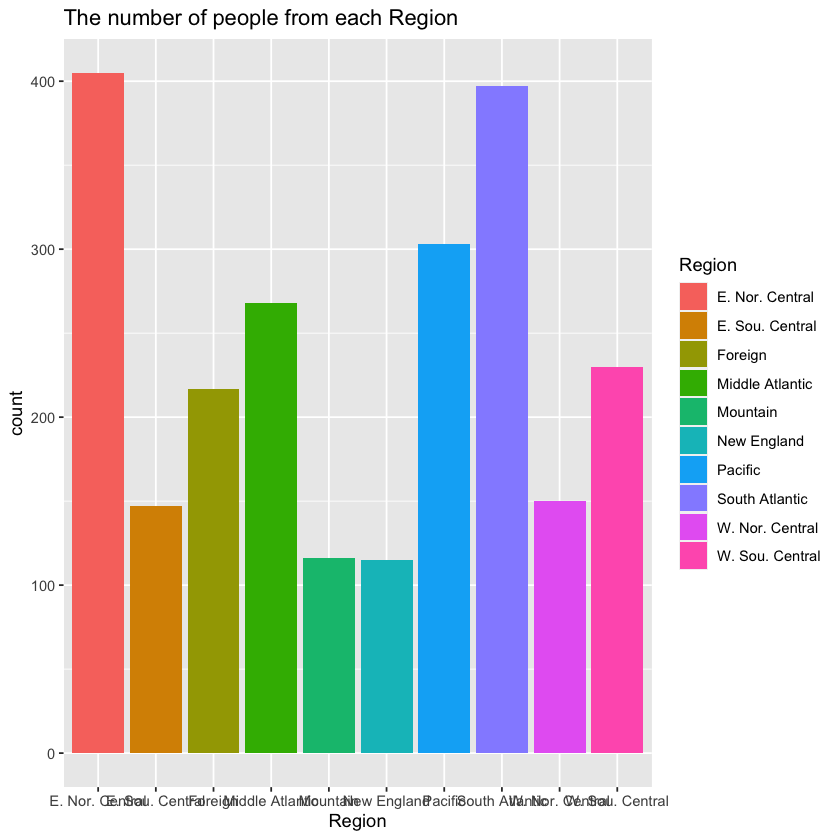

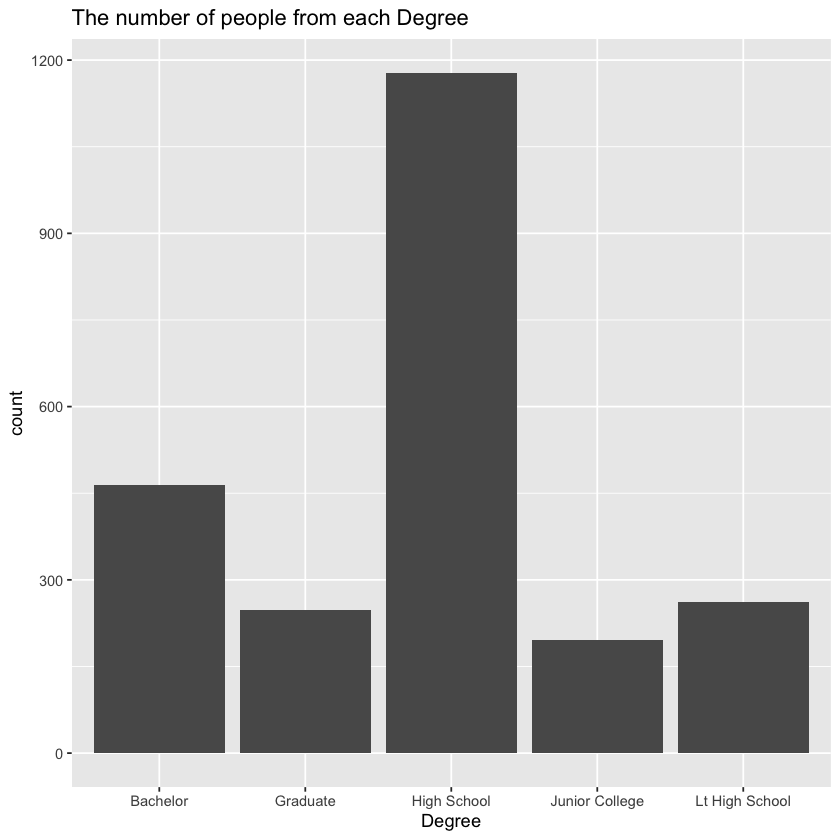

In [25]:
bar1 <- ggplot(data)
(bar1<-bar1 + 
    geom_bar(aes(Region, fill = Region)) + 
    ggtitle("The number of people from each Region"))

(bar2<-ggplot(data) + 
    geom_bar(aes(Degree)) +  
    ggtitle("The number of people from each Degree"))

,sex,weight
,<fct>,<dbl>
1,F,53
2,F,57
3,F,58
4,F,58
5,F,51
6,F,63


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


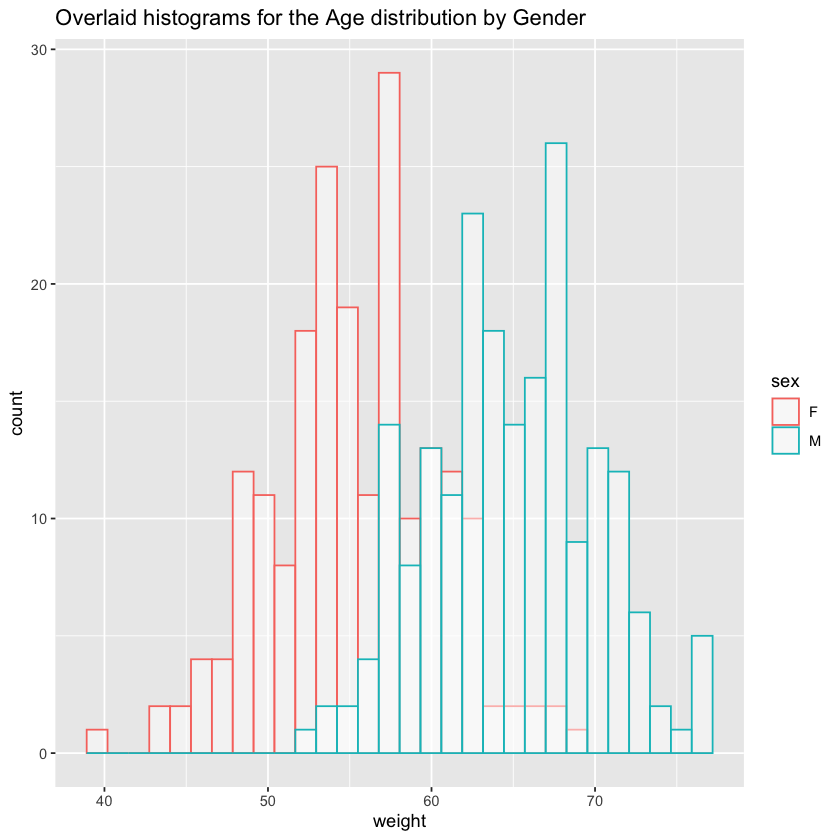

In [26]:
df <- data.frame(
  sex=factor(rep(c("F", "M"), each=200)),
  weight=round(c(rnorm(200, mean=55, sd=5), rnorm(200, mean=65, sd=5)))
)
head(df)


# Overlaid histograms
ggplot(df, aes(x=weight, color=sex)) +
  geom_histogram(fill="white", alpha=0.5, position="identity")+ggtitle("Overlaid histograms for the Age distribution by Gender")

## Density Plot

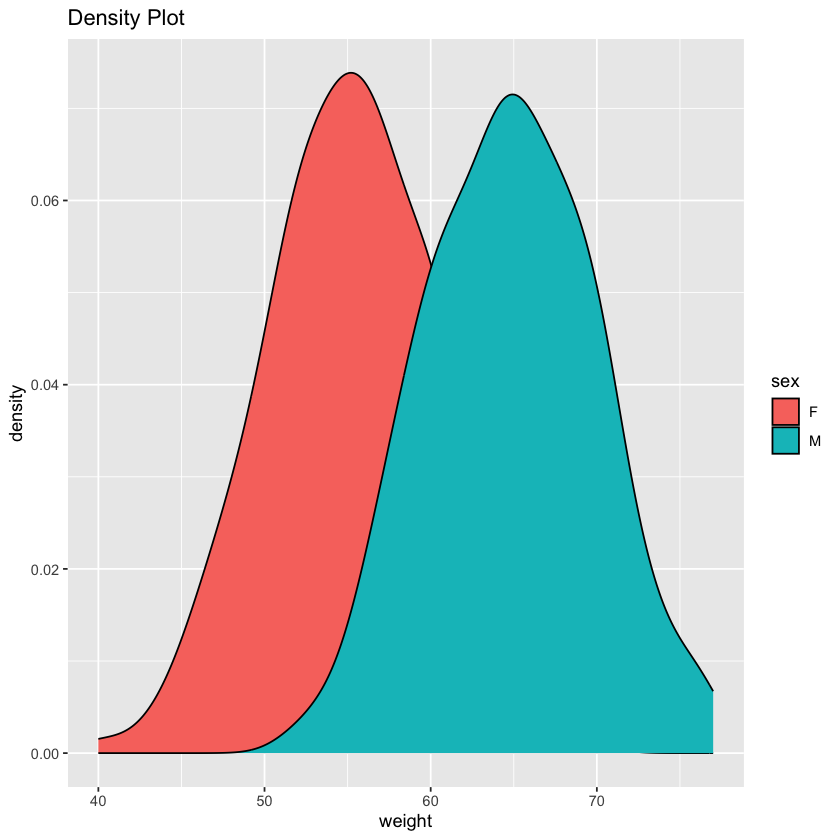

In [27]:
# Constructing density function
densityplot_df<-ggplot(df, aes(weight))
densityplot_df +geom_density(aes(fill =sex))+labs(title = "Density Plot")

## Pie Chart

 chr [1:2348] "Junior College" "High School" "Bachelor" "Bachelor" ...



      Bachelor       Graduate    High School Junior College Lt High School 
           465            247           1178            196            262 

[1] "Bachelor:19.8%"        "Graduate:10.52%"       "High School:50.17%"   
[4] "Junior College:8.35%"  "Lt High School:11.16%"

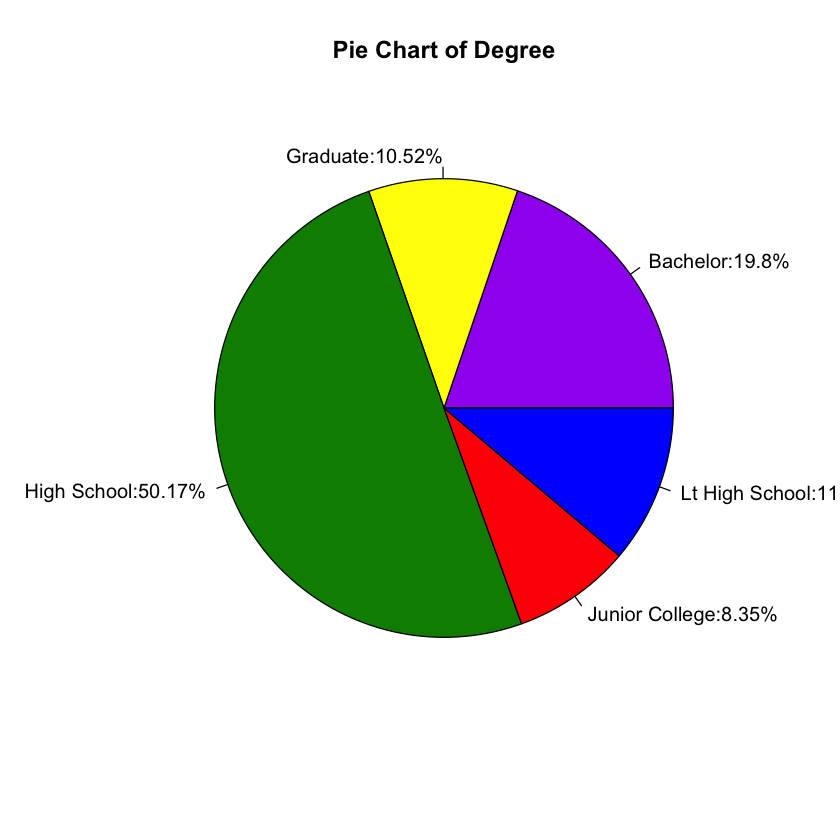

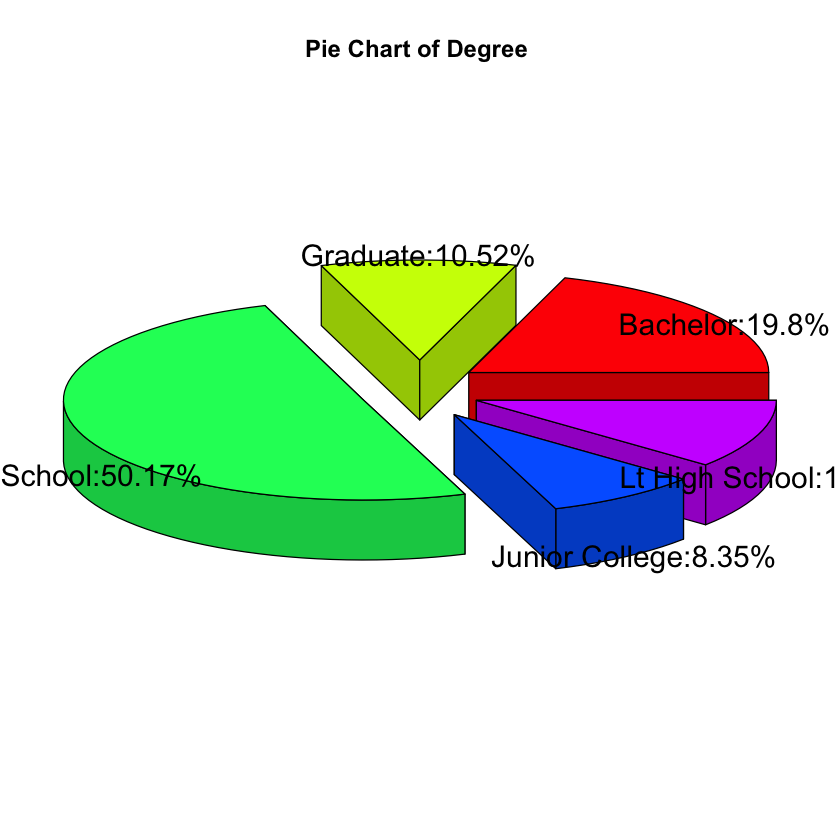

In [28]:
str(data$Degree)
NumRows=nrow(data)

(Table <- table(data$Degree))

(mylabel <- paste(names(Table), ":", 
                   round(Table/NumRows * 100,2),"%" ,sep=""))


pie(Table,labels = mylabel, main="Pie Chart of Degree",  col=c("purple", "yellow", "green4","red", "blue", "white")) 


#install.packages("plotrix")
library(plotrix)
mylabel<-paste(names(Table), ":", round(Table/NumRows * 100,2),"%" ,sep="")

pie3D(Table,labels=mylabel,explode=0.2,
      main="Pie Chart of Degree ")

## Stack Bar chart

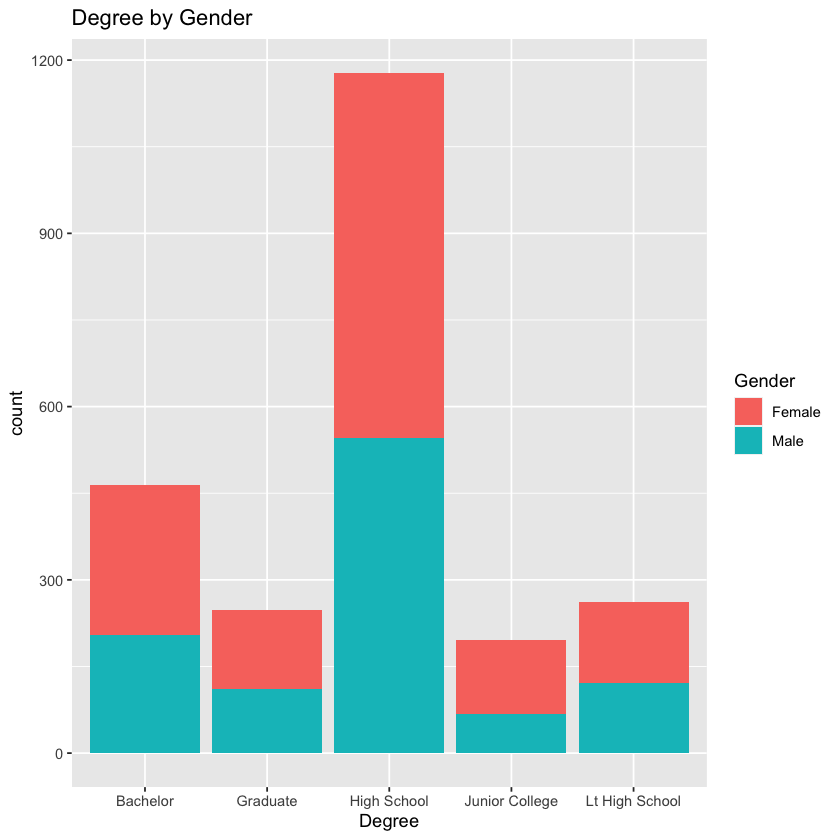

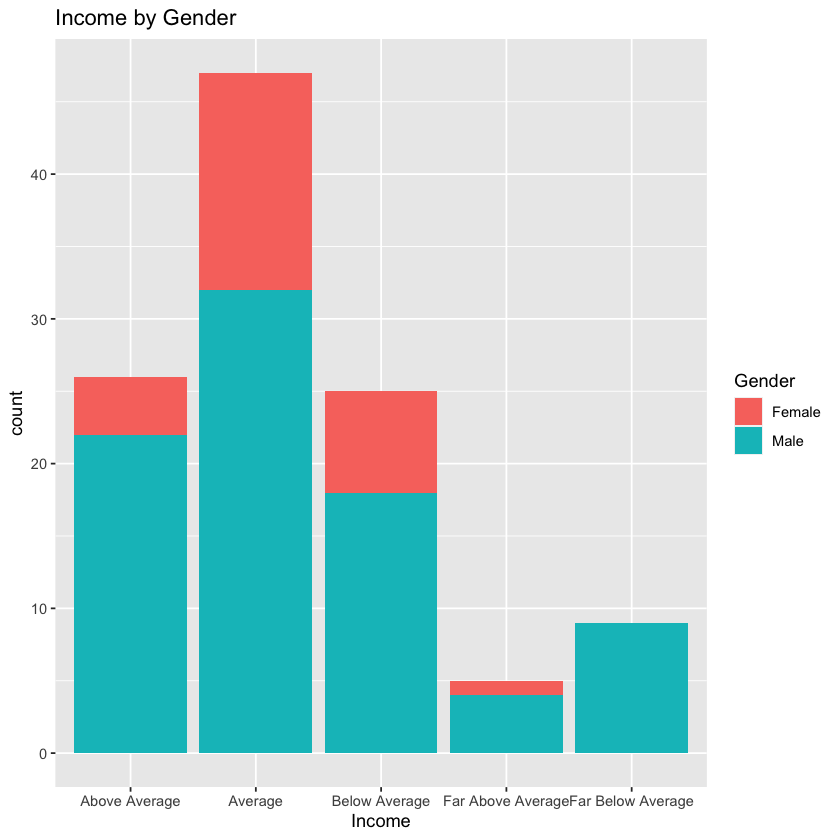

In [29]:
(G1<-ggplot(data) + 
   geom_bar(aes(Degree, fill = Gender), position="stack")+
   ggtitle("Degree by Gender"))

(G2<-ggplot(na.omit(data)) + 
   geom_bar(aes(Income, fill = Gender), position="stack")+
   ggtitle("Income by Gender"))

## Box Plots

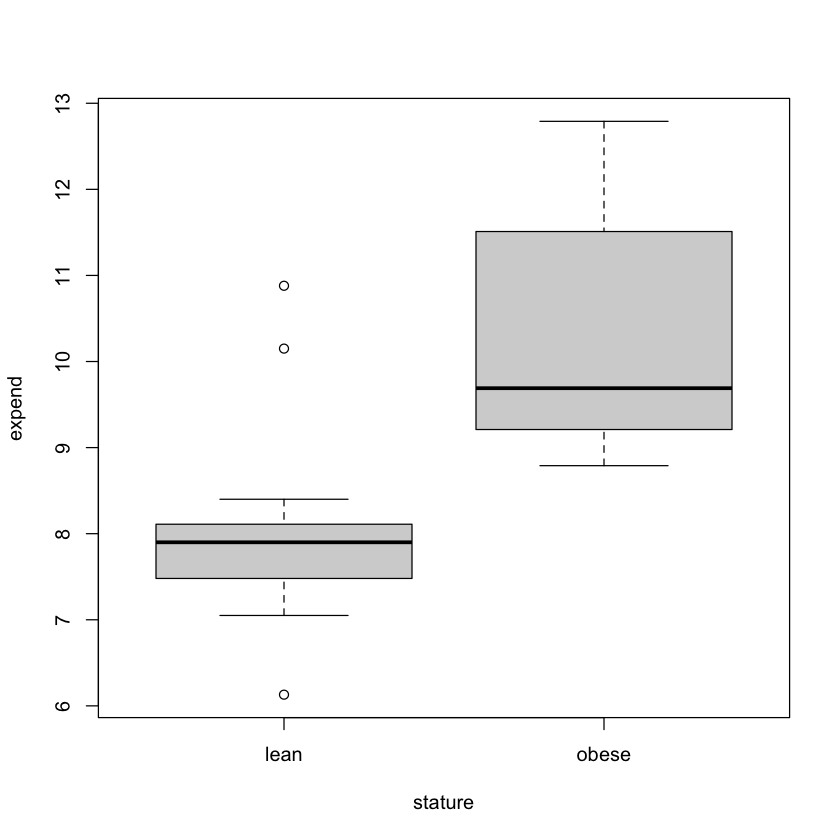

In [30]:
boxplot(expend ~ stature,data=energy)

,Name,Team,Class,Year,Position,Height,FG.Pct,ThreePt.Pct,FT.Pct,Rebounds,Assists,Blocks,Steals,Points
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Bingham, Candyce",Louisville,Sr.,2008-09,F,72,44.855,33.333,76.667,7.282,1.692,0.333,1.615,12.513
2,"Burke, Becky",Louisville,Fr.,2008-09,G,71,38.158,31.897,88.372,1.763,0.789,0.026,0.632,5.026
3,"Byrd, Deseree",Louisville,So.,2008-09,G,69,40.385,41.176,72.500,2.763,5.026,0.053,0.921,7.605
4,"Hines, Keshia",Louisville,So.,2008-09,F,73,54.450,NA,57.143,4.821,0.641,0.641,1.385,6.359
5,"Howard, Janae",Louisville,Fr.,2008-09,F,73,40.000,43.478,66.667,1.424,0.212,0.242,0.273,3.273
6,"Jackson, Mary",Louisville,Fr.,2008-09,G,70,33.824,25.000,69.643,2.474,0.342,0.026,0.263,2.289


,ID,Age,Shelf,Sodiumgram,Proteingram
,<int>,<chr>,<chr>,<dbl>,<dbl>
1,1,adult,bottom,0.007000000,0.10000000
2,2,children,bottom,0.006666667,0.06666667
3,3,children,bottom,0.004666667,0.03333333
4,4,children,bottom,0.006969697,0.03030303
5,5,adult,bottom,0.007000000,0.10000000
6,6,children,bottom,0.006000000,0.03333333


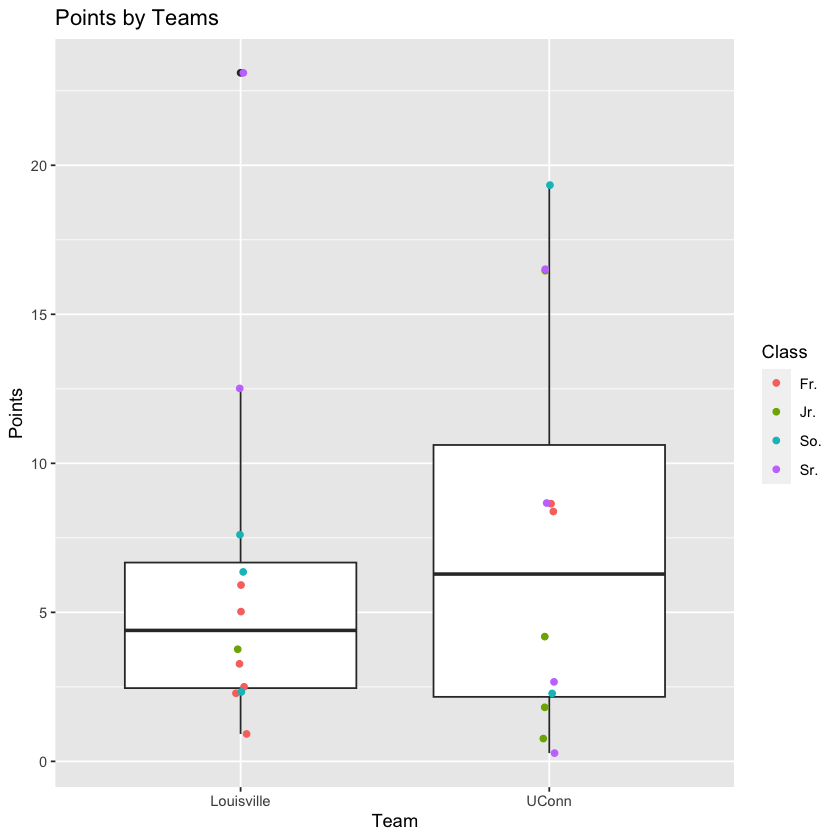

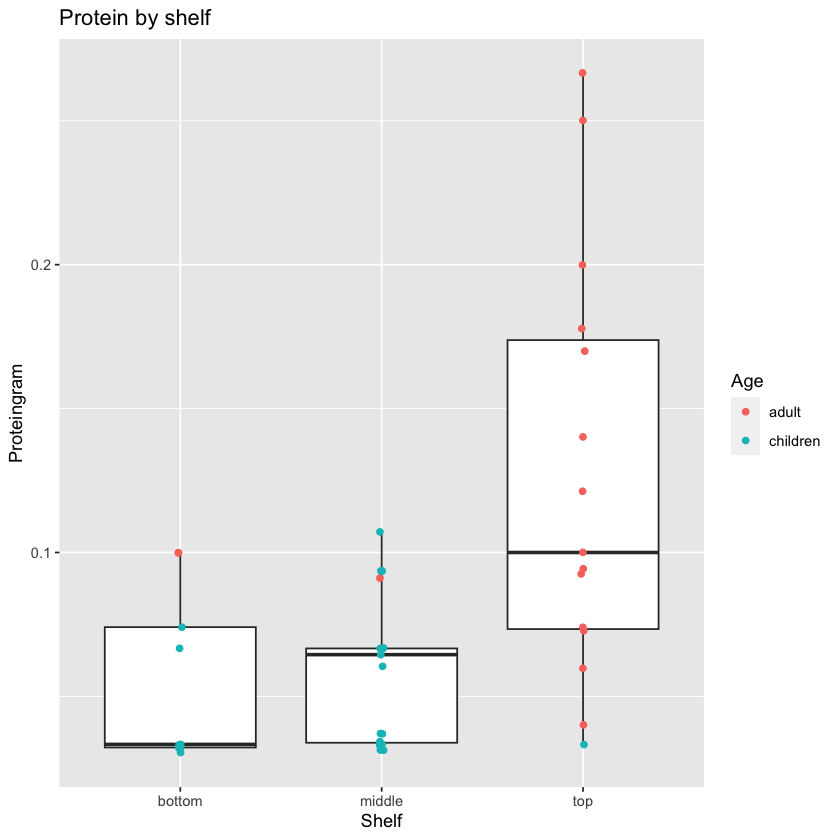

In [31]:
BBdata=read.csv("./data/Basketball09.csv",header = TRUE)
head(BBdata)

(BoxPlot1<-ggplot(BBdata, aes(x=Team , y=Points  ))+
    geom_boxplot()+
    geom_jitter( position=position_jitter(.02),aes(color=Class))+
    ggtitle("Points by Teams"))



cereal.data=read.csv("./data/Cereals.csv",header = TRUE)
head(cereal.data)

(BoxPlot2<-ggplot(cereal.data, aes(x=Shelf , y=Proteingram  ))+
    geom_boxplot()+
    geom_jitter( position=position_jitter(.01),aes(color=Age))+
    ggtitle("Protein by shelf"))

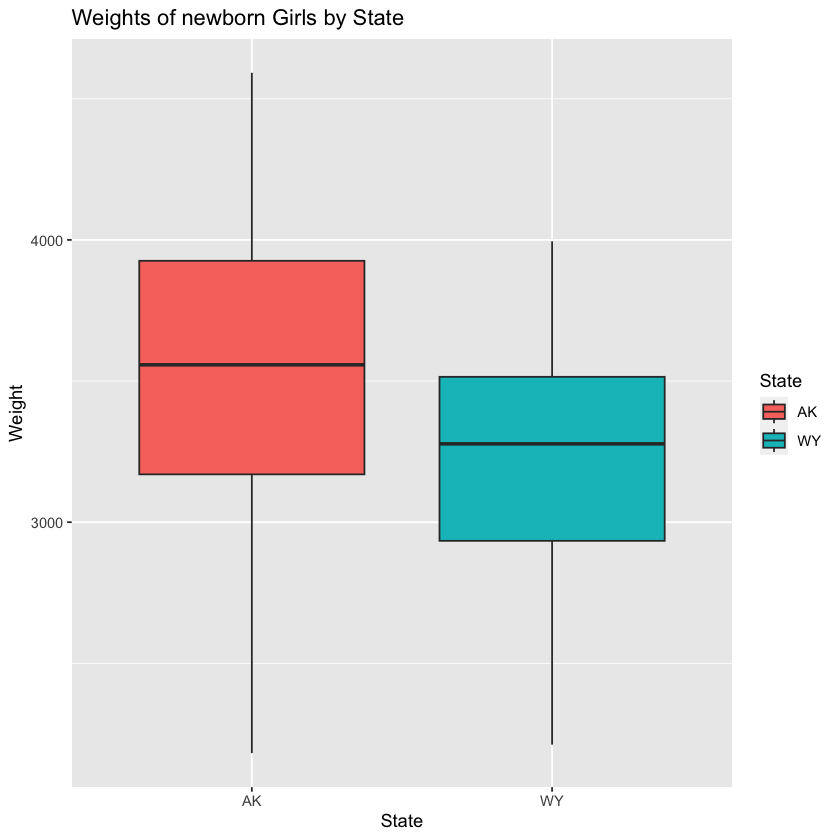

In [32]:
Girls2004 <- read.csv("./data/Girls2004.csv")
(MyL1<-ggplot(Girls2004, aes(x=State, y=Weight,fill=State))+
    geom_boxplot()+ggtitle("Weights of newborn Girls by State"))

## Violin Plot

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


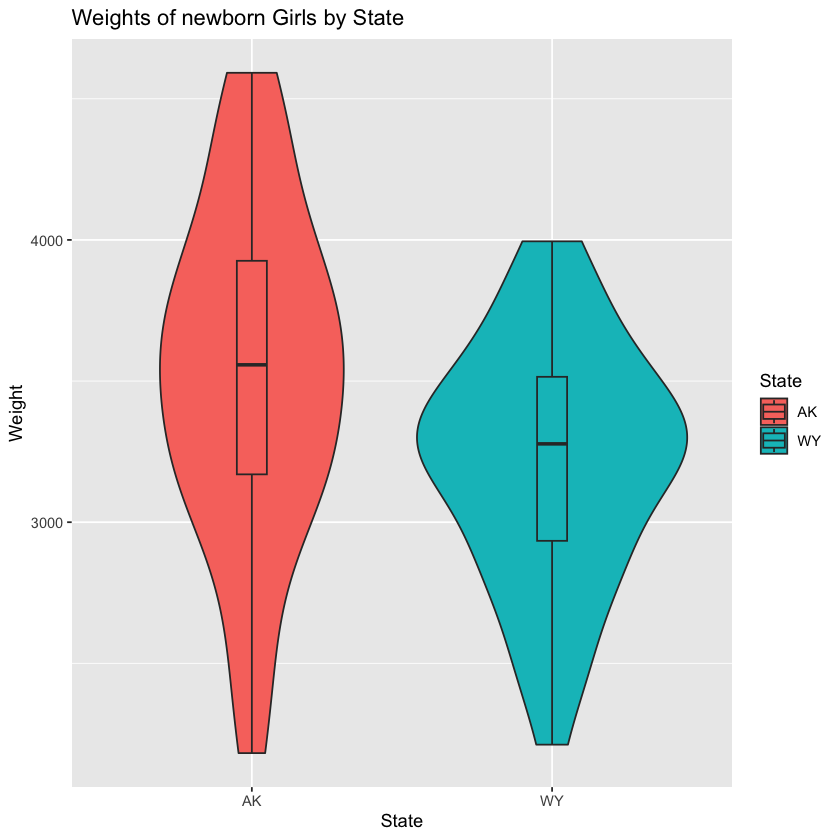

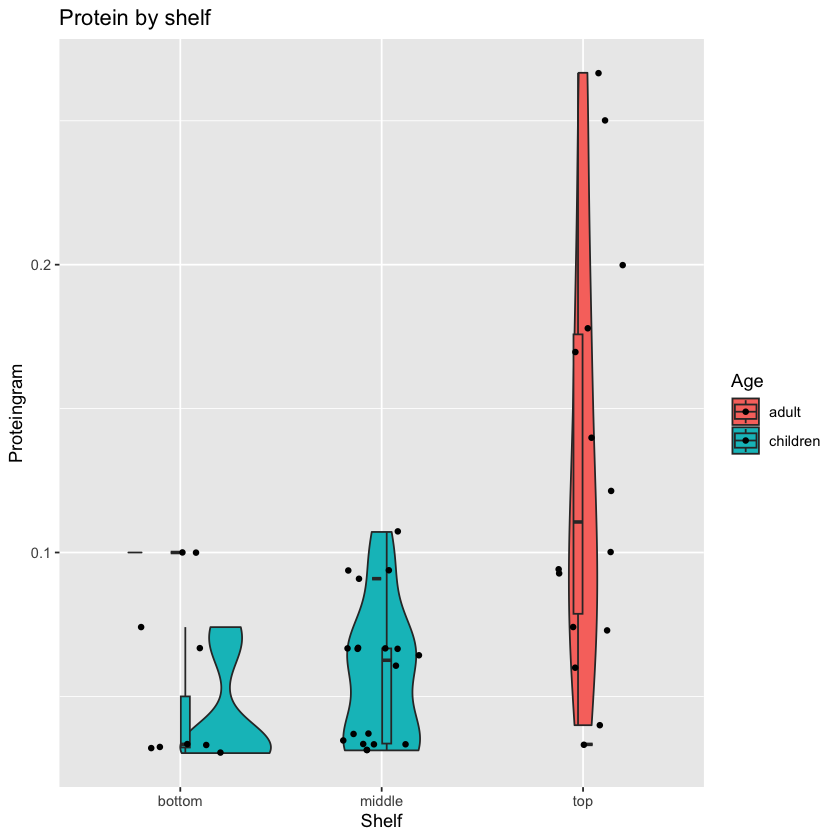

In [33]:
(V1 <- ggplot(Girls2004, aes(x=State, y=Weight,fill=State)) + 
    geom_violin(trim=TRUE)+ geom_boxplot(width=0.1)+
    ggtitle("Weights of newborn Girls by State"))

(V2 <- ggplot(cereal.data, aes(x=Shelf , y=Proteingram, fill=Age)) + 
    geom_violin(trim=TRUE)+ geom_boxplot(width=0.1)+
    ggtitle("Protein by shelf")+
    geom_jitter(shape=16, position=position_jitter(0.2)))

## Histogram

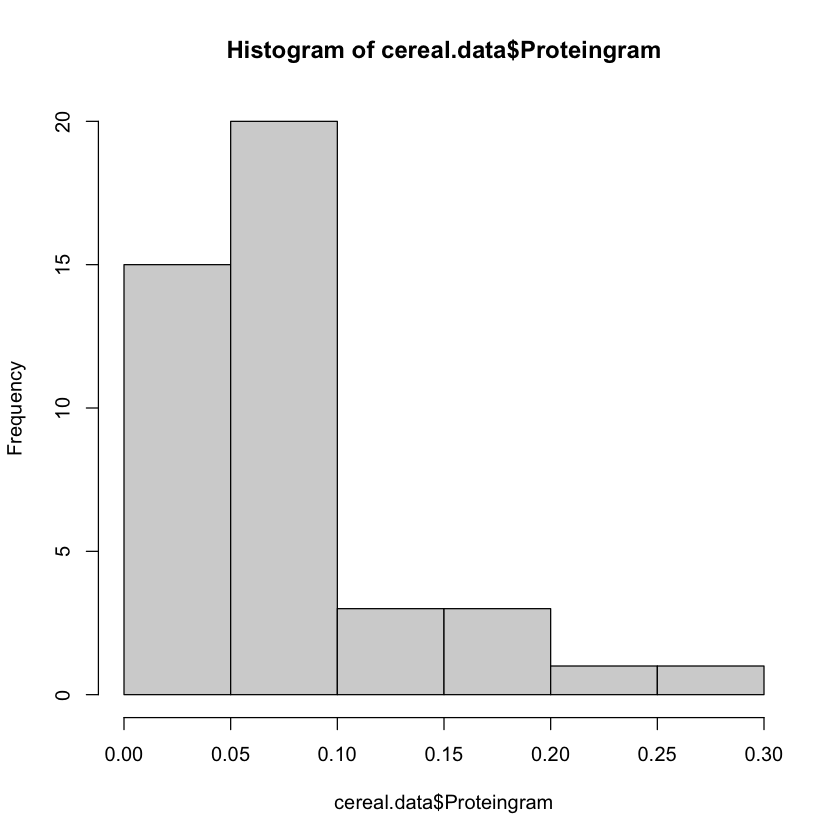

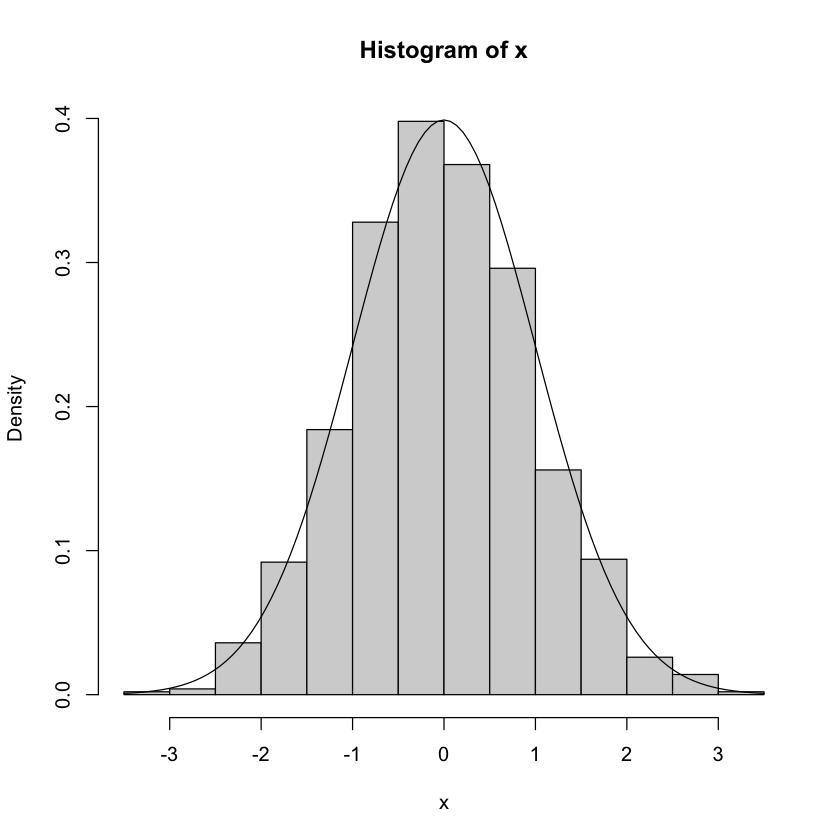

In [34]:
hist(cereal.data$Proteingram)

x <- rnorm(1000)
hist(x,freq=F)
curve(dnorm(x),add=T)


For histogram in ggplot: <http://www.sthda.com/english/wiki/ggplot2-histogram-plot-quick-start-guide-r-software-and-data-visualization>



## Heatmap

This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. 

Apps : Number of applications received
Accept : Number of applicants accepted
Enroll : Number of new students enrolled
Grad.Rate : Graduation rate
PhD : Percent of faculty with Ph.D.’s

,Apps,Accept,Enroll,PhD,Grad.Rate
Apps,1.00,0.94,0.85,0.39,0.15
Accept,0.94,1.00,0.91,0.36,0.07
Enroll,0.85,0.91,1.00,0.33,-0.02
PhD,0.39,0.36,0.33,1.00,0.31
Grad.Rate,0.15,0.07,-0.02,0.31,1.00


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,Apps,Apps,1.00
2,Accept,Apps,0.94
3,Enroll,Apps,0.85
4,PhD,Apps,0.39
5,Grad.Rate,Apps,0.15
6,Apps,Accept,0.94


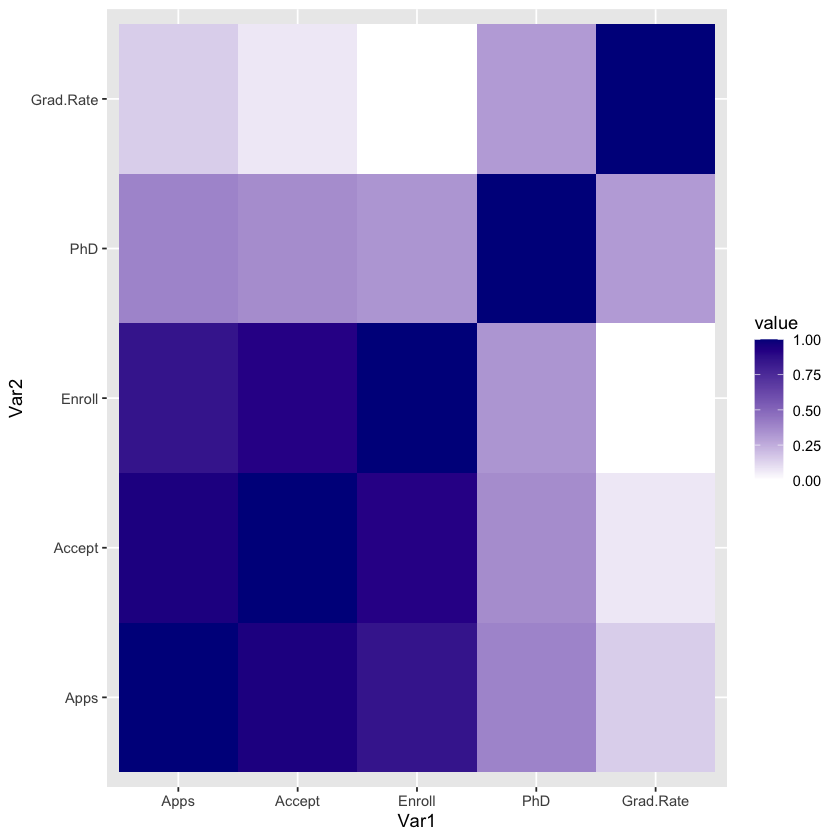

In [35]:
college= read.csv("./data/College.csv", header = TRUE)
mydata <- college[, c(3,4,5,14,19)]
co <- round(cor(mydata),2)
head(co)

library(reshape2)
melted_co <- melt(co)
head(melted_co)

# Basic heatmap
(H1 <- ggplot(data = melted_co, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
  scale_fill_gradient2(low = "white", high = "dark blue" ))

,Apps,Accept,Enroll,PhD,Grad.Rate
Apps,1,0.94,0.85,0.39,0.15
Accept,NA,1.00,0.91,0.36,0.07
Enroll,NA,NA,1.00,0.33,-0.02
PhD,NA,NA,NA,1.00,0.31
Grad.Rate,NA,NA,NA,NA,1.00


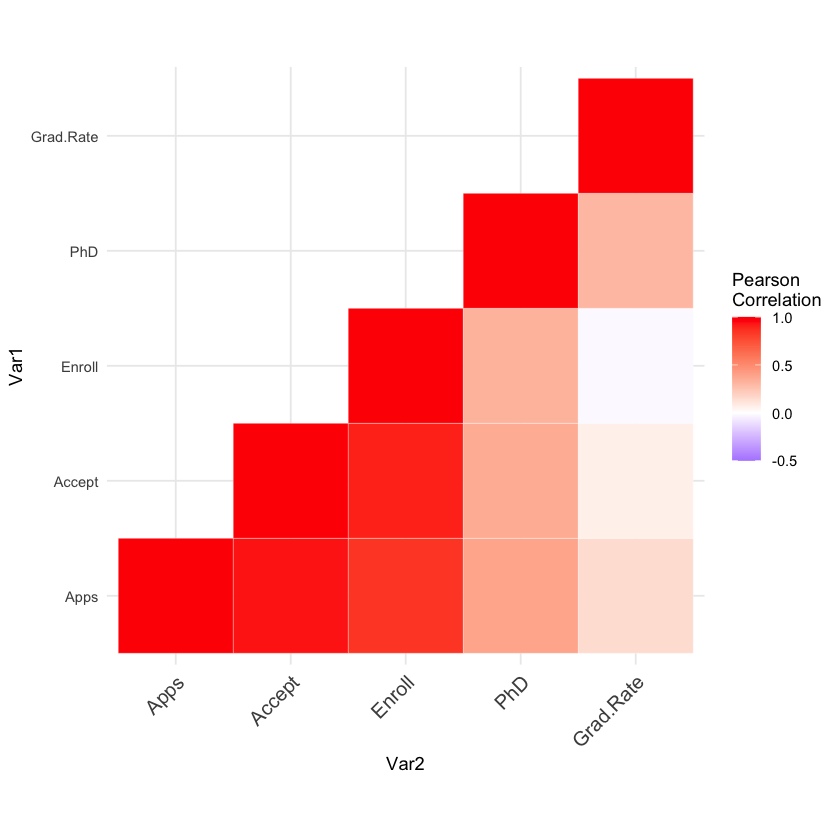

In [36]:
# Get upper triangle of the correlation matrix
get_upper_tri<-function(cormat){
    cormat[lower.tri(cormat)] <- NA
    return(cormat)
  }

upper_tri <- get_upper_tri(co)
upper_tri

melted_cormat <- melt(upper_tri, na.rm = TRUE)

(H2 <- ggplot(data = melted_cormat, aes(Var2, Var1, fill = value)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-0.5,1), space = "Lab",
                         name="Pearson\nCorrelation") +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1)) +
    coord_fixed())

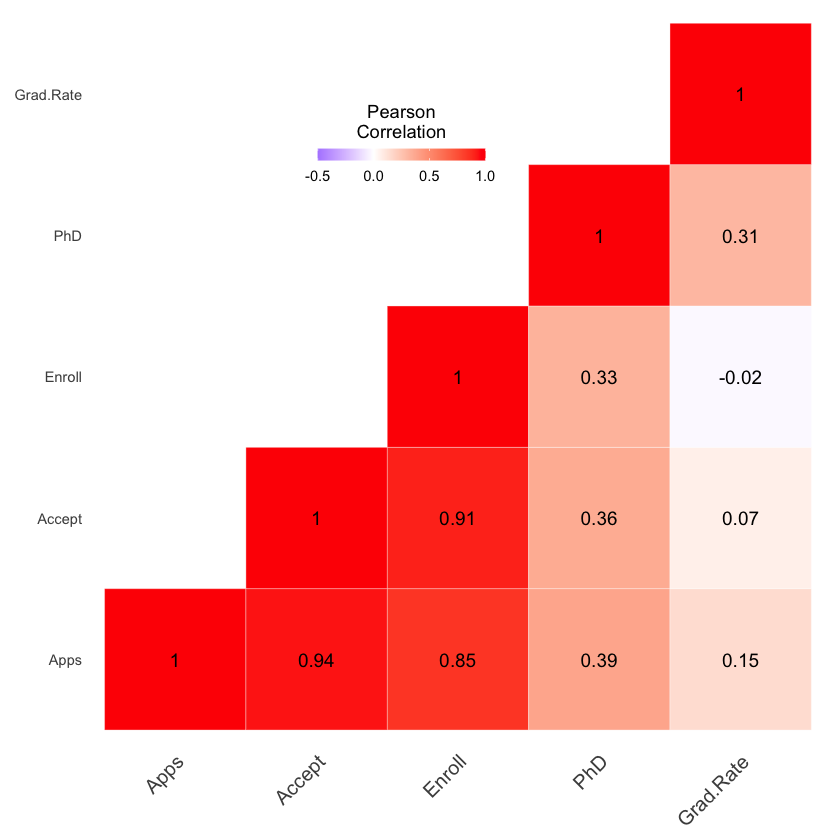

In [37]:
# Add correlation coefficients on the heatmap
(H3 <- H2 +
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
    theme(
      axis.title.x = element_blank(),
      axis.title.y = element_blank(),
      panel.grid.major = element_blank(),
      panel.border = element_blank(),
      panel.background = element_blank(),
      axis.ticks = element_blank(),
      legend.justification = c(1, 0),
      legend.position = c(0.55, 0.75),
      legend.direction = "horizontal") +
    guides(fill = guide_colorbar(barwidth = 7, barheight = 0.5,
                                 title.position = "top", title.hjust = 0.5)))

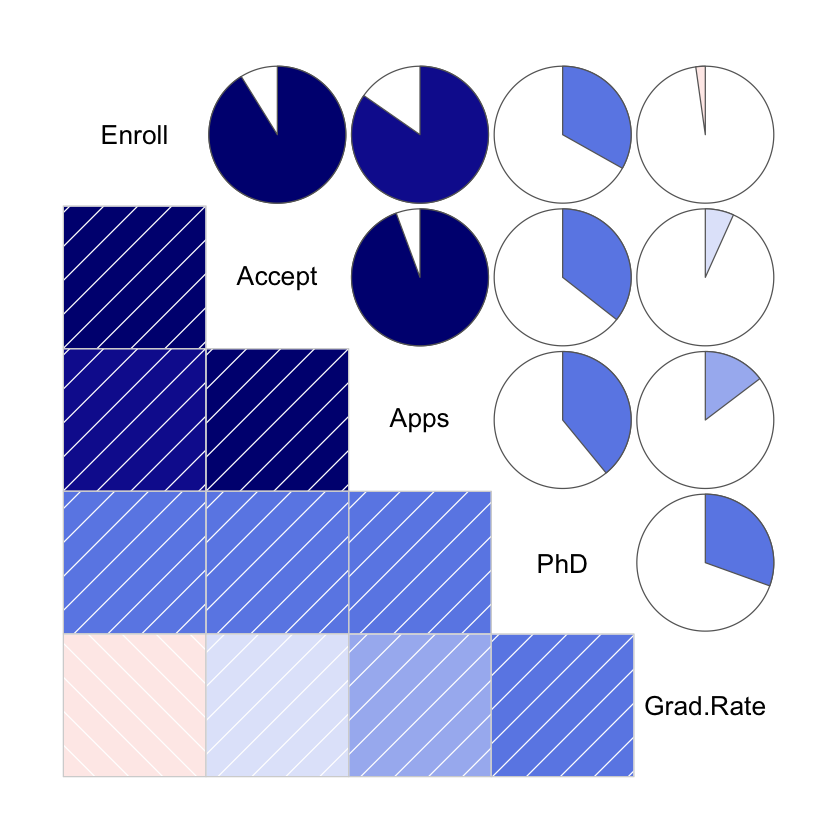

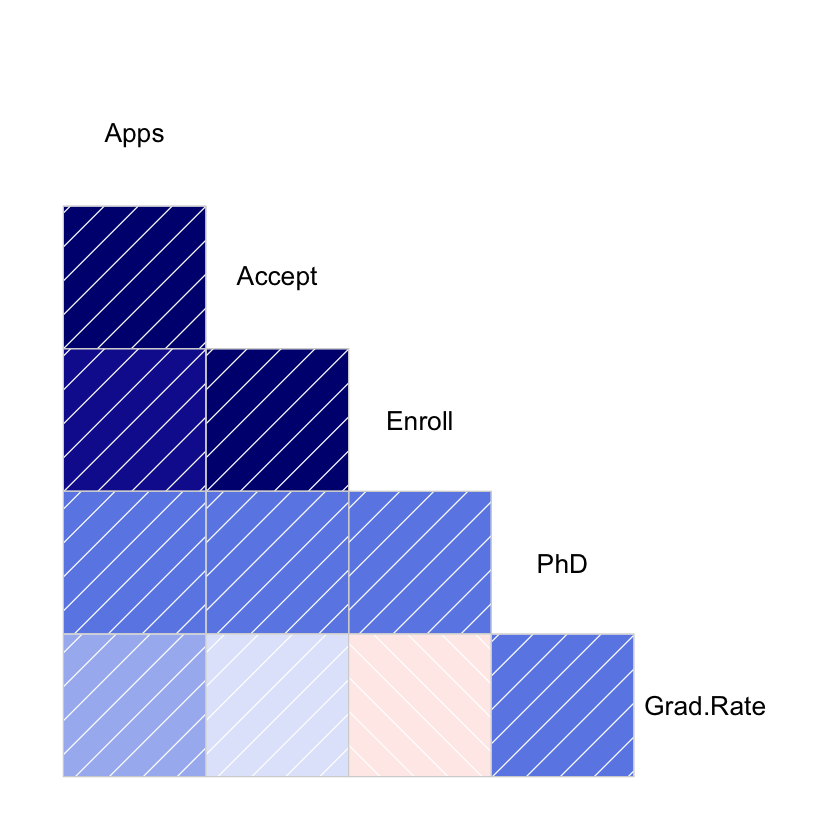

In [38]:
library(corrgram)
corrgram(mydata, order=TRUE,lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt)

corrgram(mydata, order=NULL, lower.panel=panel.shade,
  upper.panel=NULL, text.panel=panel.txt)

For heatmap in ggplot: <http://www.sthda.com/english/wiki/ggplot2-quick-correlation-matrix-heatmap-r-software-and-data-visualization>

## Scatter Plot

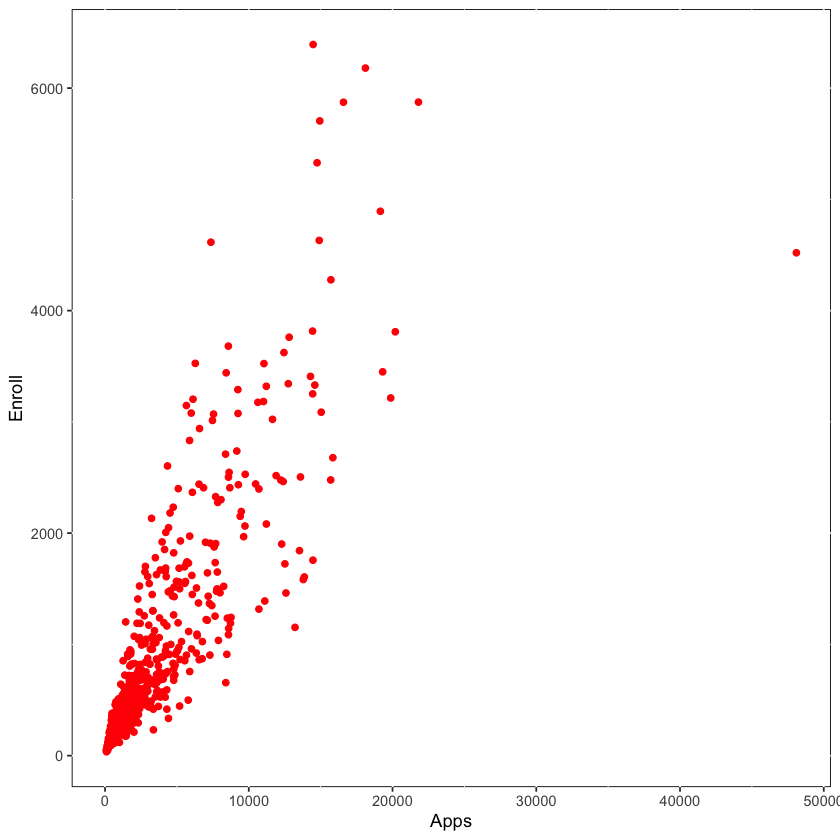

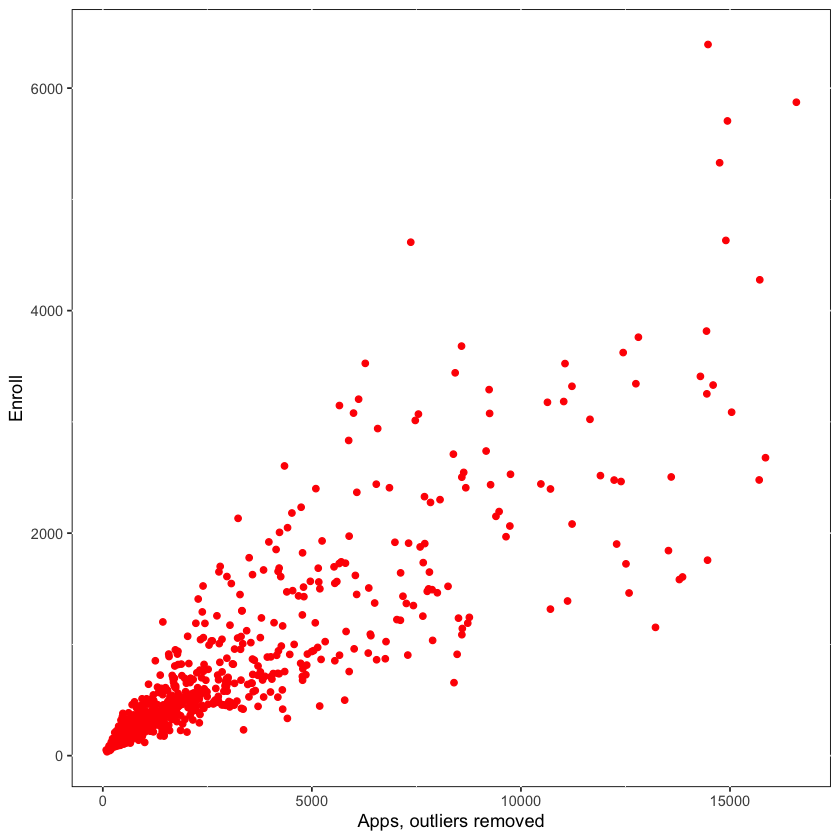

In [39]:
# Basic scatter plot
(S1 <- ggplot(mydata, aes(x=Apps, y=Enroll)) + 
   geom_point(color='red') +
   theme(panel.background = element_rect(fill = "white", colour = "black")))

# Remove outliers
mydata <- mydata[!mydata$Apps>17500,]
(S2 <- ggplot(mydata, aes(x=Apps, y=Enroll)) + 
    geom_point(color='red') +
    xlab('Apps, outliers removed') +
    theme(panel.background = element_rect(fill = "white", colour = "black")))

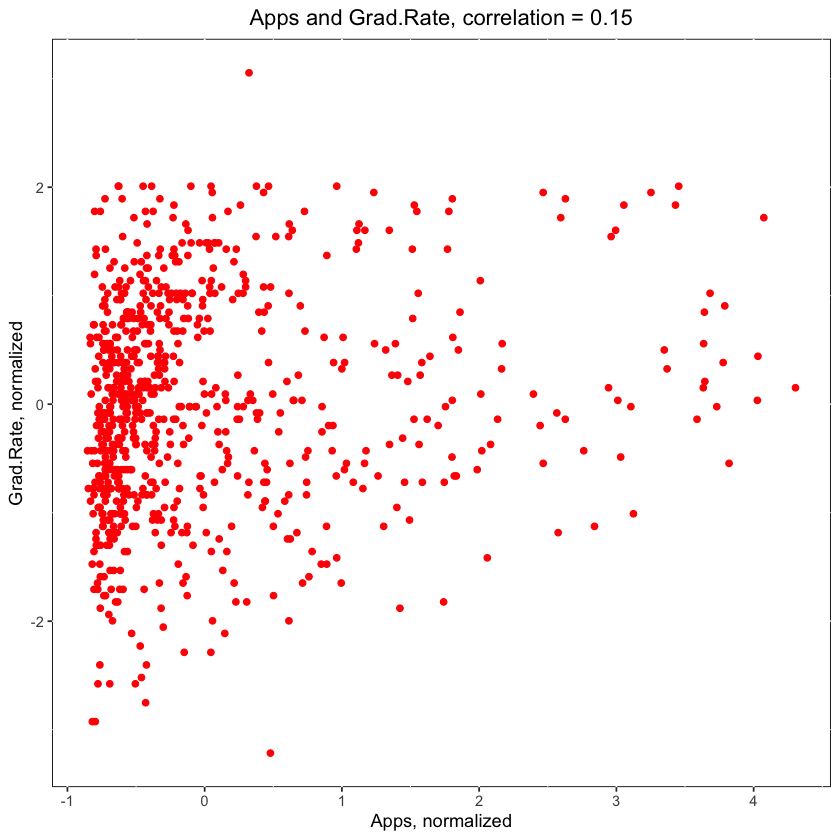

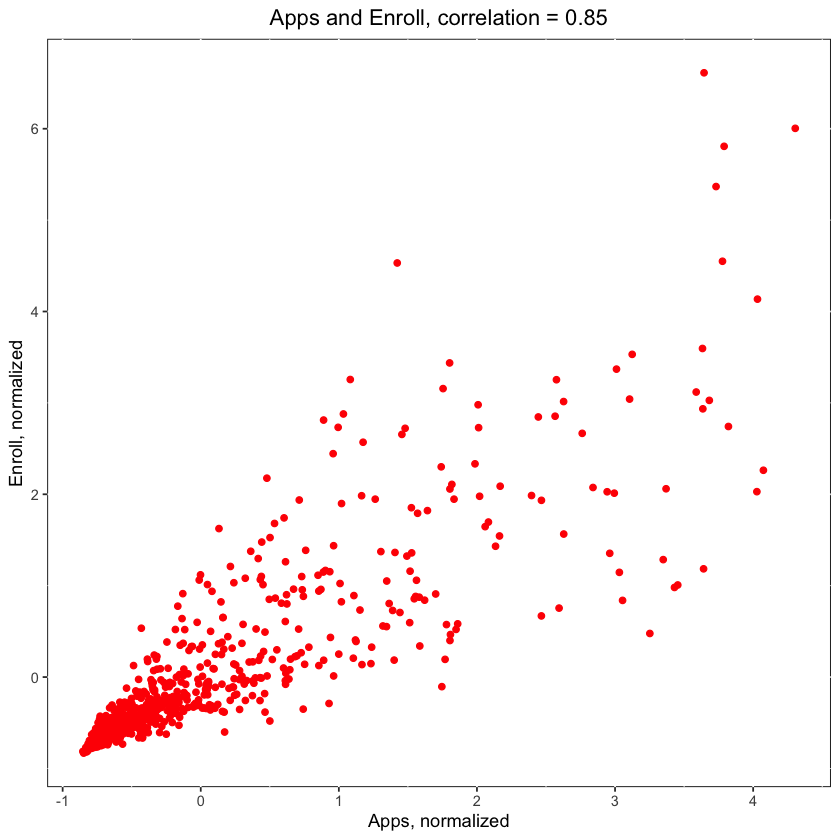

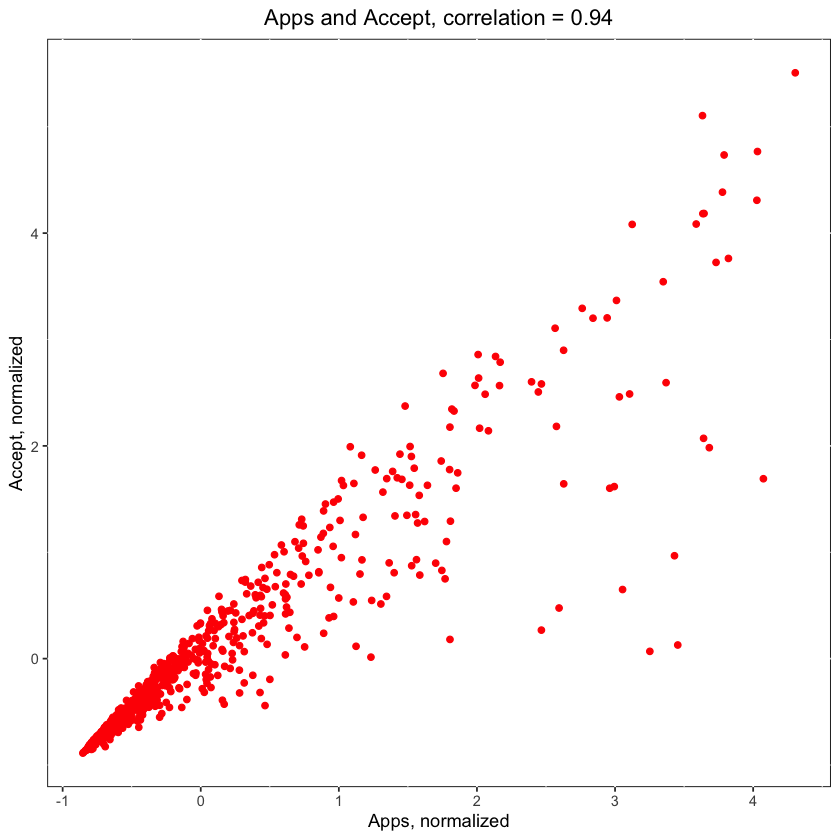

In [40]:
# Normalize data
mydata_normalized <- as.data.frame(scale(mydata))

# Scatter plots with different correlations
(S3 <- ggplot(mydata_normalized, aes(x=Apps, y=Grad.Rate)) + 
    geom_point(color='red') +
    labs(title='Apps and Grad.Rate, correlation = 0.15',x='Apps, normalized',
         y='Grad.Rate, normalized') +
    theme(panel.background = element_rect(fill = "white", colour = "black"), 
         plot.title = element_text(hjust=0.5)))

(S4 <- ggplot(mydata_normalized, aes(x=Apps, y=Enroll)) + 
    geom_point(color='red') +
    labs(title='Apps and Enroll, correlation = 0.85',x='Apps, normalized',y='Enroll, normalized')+
    theme(panel.background = element_rect(fill = "white", colour = "black"), 
         plot.title = element_text(hjust=0.5)))

(S5 <- ggplot(mydata_normalized, aes(x=Apps, y=Accept)) + 
   geom_point(color='red') +
   labs(title='Apps and Accept, correlation = 0.94',x='Apps, normalized',y='Accept, normalized')+
   theme(panel.background = element_rect(fill = "white", colour = "black"), 
         plot.title = element_text(hjust=0.5)))

## Line Graph

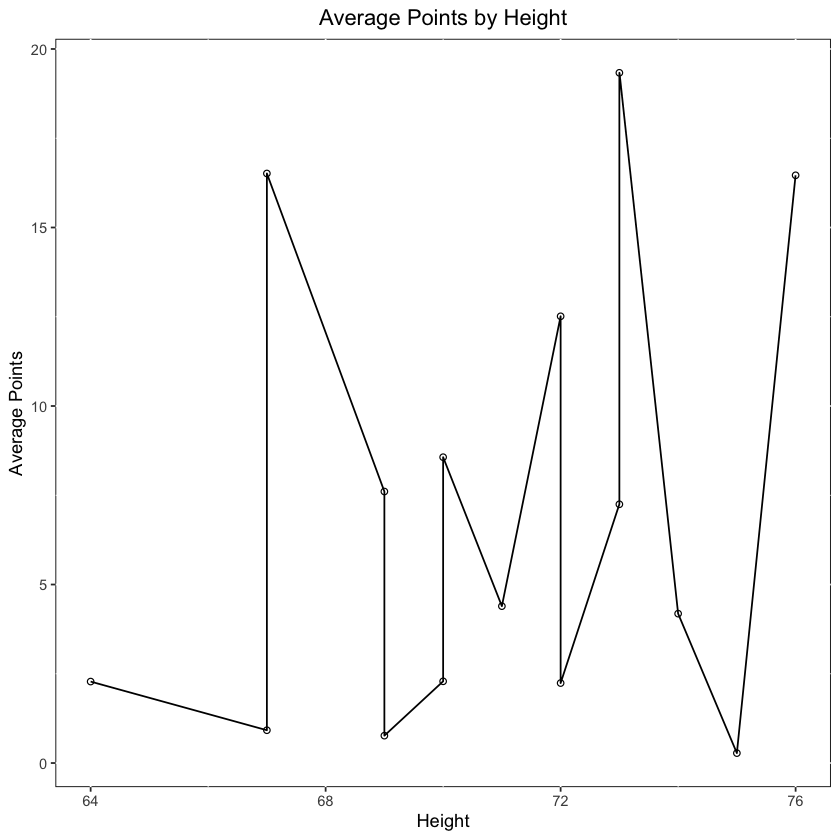

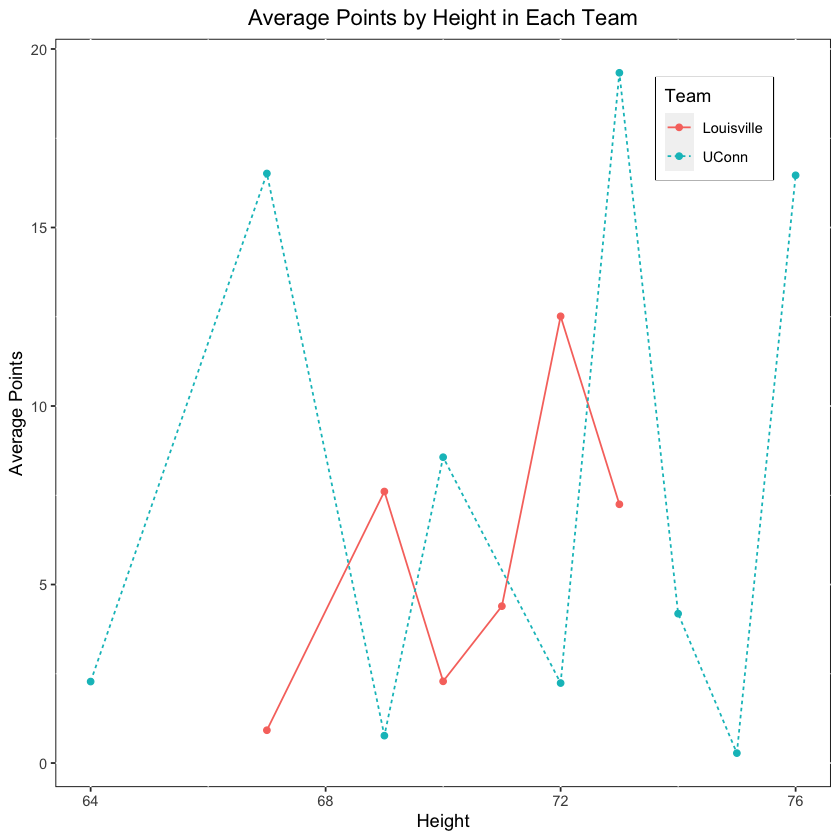

In [41]:
# Caculate mean points by groups
BBdata_line <- aggregate(BBdata$Points, by=list(BBdata$Team,BBdata$Height), FUN=mean)
colnames(BBdata_line) <- c('Team','Height','Points.Mean')

(L1 <- ggplot(BBdata_line, aes(x=Height, y=Points.Mean)) +
   geom_line() +
   geom_point(shape=1) +
   labs(title = "Average Points by Height", y='Average Points') +
   theme(panel.background = element_rect(fill = "white", colour = "black"), 
         plot.title = element_text(hjust=0.5)))

(L2 <- ggplot(BBdata_line, aes(x=Height, y=Points.Mean, group=Team)) +
    geom_line(aes(linetype=Team, color=Team)) +
    geom_point(aes(color=Team)) +
    labs(title = "Average Points by Height in Each Team", y='Average Points') + 
    theme(panel.background = element_rect(fill = "white", colour = "black"), 
          plot.title = element_text(hjust=0.5),
          legend.box.background = element_rect(),
          legend.position = c(.85, .88)))